<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/Youtube_Trending_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import wordcloud
import json
import datetime

In [3]:
plt.style.use('seaborn')

In [4]:
# Reading the dataset

US_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/trending_youtube/USvideos.csv')

US_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Let's see some information about our dataset

In [5]:
US_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

We can see that there are 40,949 non-null observations in each column of the dataframe except for the **"description"** comlumn, it only has 40,379 non-null values.

## Data cleaning

The **"description"** column has some null values. Let's take a look

In [6]:
US_df[US_df['description'].isna()].head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN


So let's get rid of those null values. We are going to replacing them with an empty string in place of each null value in the **"description"** column instead of removing the whole line.

In [7]:
US_df.description = US_df.description.fillna('')

US_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

## Dataset collection years
We are going to see in which years the dataset was collected

In [8]:
# In ra tổng số video đc sản xuất trong mỗi năm trong dataset
years = US_df['trending_date'].apply(lambda x: '20' + x[:2])  # in ra năm mà video được sx
years = years.value_counts()  # đếm xem có bao nhiêu video ra mắt mỗi năm
years = pd.DataFrame(years).reset_index().rename(columns={'index': 'year', 'trending_date': 'numbers'}).sort_values(by='year')
years

,year,numbers
1,2017,9600
0,2018,31349


In [9]:
US_df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018    0.765562
2017    0.234438
Name: trending_date, dtype: float64

So we can see that 77% of the collected dataset was in 2018 and 23% in 2017

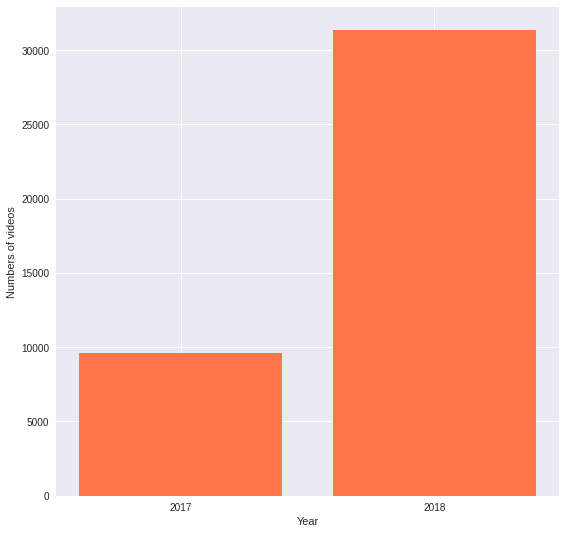

In [10]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.bar(years.year, years.numbers, color='#ff764a', width=0.8)
ax.set(xlabel = 'Year', ylabel = 'Numbers of videos')
plt.show()

## Describtion of numerical columns

Now let's see some statistical information about the numerical columns of our dataset

In [11]:
US_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


From  the table above, we can see that:

*   The mean number of views is 2.36e6 while the median is 6.81e5, which means **views** has right skewed distribution and half of the trending videos have less views than the average.
*   Same things happpened to **likes**, **dislikes** and **comment_count**

---
## View histogram
Now let's plot a histogram for the **views** column to take a look at its distribution




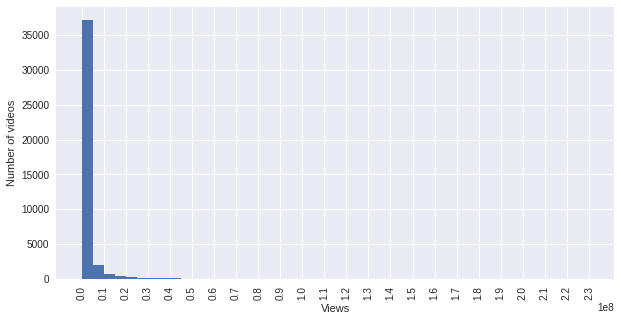

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(US_df.views, bins = np.linspace(0, 2.3e8, 47))
ax.set(xlabel="Views", ylabel="Number of videos", xticks=np.arange(0, 2.4e8, 1e7))
plt.xticks(rotation=90)
plt.show()

We can see that most of the trending videos have less than 0.1e8 (10 million) views so let's plot the histogram just for the videos with 10 million views or less

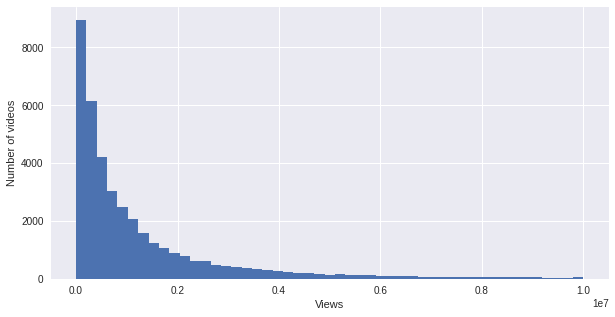

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(US_df[US_df.views < 0.1e8].views, bins = np.linspace(0, 0.1e8, 50))
ax.set(xlabel='Views', ylabel='Number of videos')
plt.show()

The percentage of videos less than 0.5e7 (5 million) views

In [14]:
US_df[US_df['views'] < 0.5e7]['views'].count() / US_df['views'].count() * 100 

90.81052040342865

## Likes histogram
Similarly, we plot the histogram for **likes** column

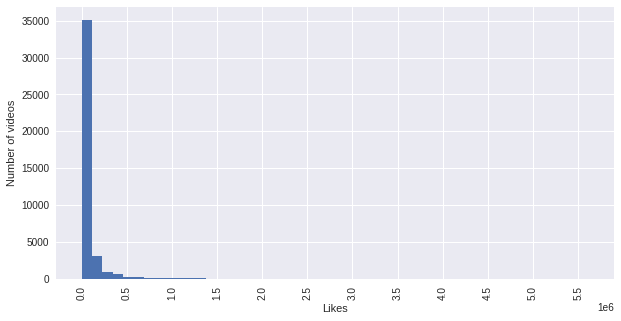

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(US_df.likes, bins = np.linspace(0, 5.62e6, 50))
ax.set(xlabel="Likes", ylabel="Number of videos", xticks=np.arange(0, 5.62e6, 5e5))
plt.xticks(rotation=90)
plt.show()

We can see that most of the trending videos have less than 0.1e6 (100,000) views so let's plot the histogram just for the videos with 100,000 views or less

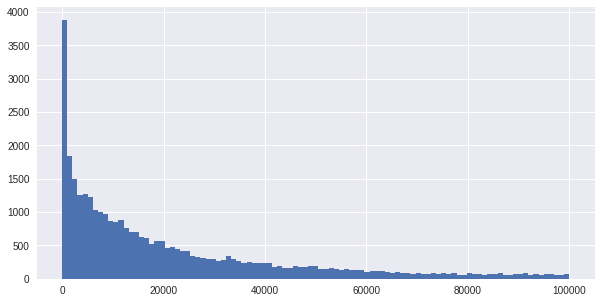

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(US_df.likes[US_df.likes <= 0.1e6], bins = np.linspace(0, 0.1e6, 100))
plt.show()

We can see that the vast majority of trending videos have 40,000 likes or less and we have the percentage of those videos

In [17]:
US_df[US_df['likes'] < 40000]['likes'].count() / US_df['likes'].count() * 100

68.4900730176561

And similarly, the percentage of videos have 100,000 likes or less

In [18]:
US_df[US_df['likes'] < 100000]['likes'].count() / US_df['likes'].count() * 100

83.91657915944222

## Comment count histogram


Similarly, we plot the histogram for **comment_count** column

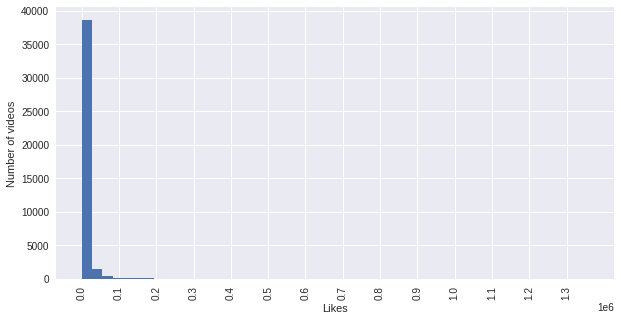

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(US_df.comment_count, bins = np.linspace(0, 1.36e6, 50))
ax.set(xlabel="Likes", ylabel="Number of videos", xticks=np.arange(0, 1.36e6, 1e5))
plt.xticks(rotation=90)
plt.show()

Let's take a closer look by eliminating entries with comment count larger than 0.1e6 (100000)

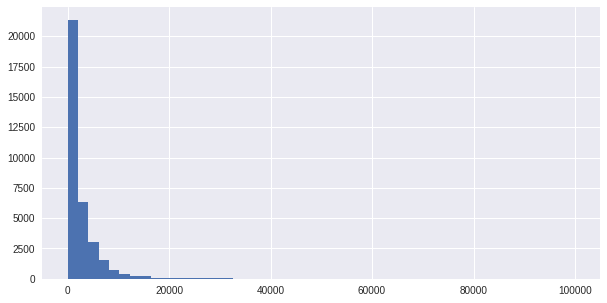

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(US_df.comment_count[US_df.likes <= 0.1e6], bins = np.linspace(0, 0.1e6, 50))
plt.show()

The percetage of videos with less than 10,000 comment

In [21]:
US_df[US_df['comment_count'] < 10000]['comment_count'].count() / US_df['comment_count'].count() * 100

83.81157049012185

The percetage of videos with less than 5,000 comment

In [22]:
US_df[US_df['comment_count'] < 5000]['comment_count'].count() / US_df['comment_count'].count() * 100

72.25817480280348

## Description on non-numerical columns
We now describe non-numerical columns

In [23]:
US_df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,18.01.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570


From the table above, we can see that there are 205 unique dates, which means that our dataset contains collected data about trending videos in 205 days.

From the **video_id** section, we can see that there are total 40949 videos, but there are only 6351 unique videos which means some videos appeared on the the trending list **more than one day**. For example, the video with title "WE MADE OUR MOM CRY...HER DREAM CAME TRUE!" appeared 30 times on the trending list.

In [24]:
US_df[US_df.title == 'WE MADE OUR MOM CRY...HER DREAM CAME TRUE!'].count()

video_id                  30
trending_date             30
title                     30
channel_title             30
category_id               30
publish_time              30
tags                      30
views                     30
likes                     30
dislikes                  30
comment_count             30
thumbnail_link            30
comments_disabled         30
ratings_disabled          30
video_error_or_removed    30
description               30
dtype: int64

But you can see that there are 6351 unique videos but there are 6455 unique titles, which means some videos have more than one title. Our prediciton is that maybe after featuring in the trending list, it appeared agian on another day but with a modified title or maybe different videos from different channels have the same titles.

The firgure for **channel_title** is much lower than **video_id**, which means there were only a few channel who always made hits.



In [25]:
test = pd.concat([US_df.video_id, US_df.title], axis=1, keys=['video_id', 'title']).drop_duplicates()
groups = []
for t in test.title:
    if len(test[test.title == t]) != 1:
        groups.append(t)

US_df[US_df.title == 'Justice League - Movie Review']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
408,pgjRX9oGF7g,17.16.11,Justice League - Movie Review,Jeremy Jahns,24,2017-11-15T07:55:04.000Z,"Justice league|""dceu""|""avengers""|""DC""|""wb""|""co...",593969,24672,735,5173,https://i.ytimg.com/vi/pgjRX9oGF7g/default.jpg,False,False,False,The heroes of the DCEU have come together whic...
630,8KT1UCsOE74,17.17.11,Justice League - Movie Review,Chris Stuckmann,24,2017-11-15T09:43:32.000Z,"Justice League|""Movie Review""|""Chris Stuckmann...",816696,29135,1267,8648,https://i.ytimg.com/vi/8KT1UCsOE74/default.jpg,False,False,False,FACEBOOK: https://www.facebook.com/ChrisStuckm...
865,8KT1UCsOE74,17.18.11,Justice League - Movie Review,Chris Stuckmann,24,2017-11-15T09:43:32.000Z,"Justice League|""Movie Review""|""Chris Stuckmann...",914063,31150,1471,9449,https://i.ytimg.com/vi/8KT1UCsOE74/default.jpg,False,False,False,FACEBOOK: https://www.facebook.com/ChrisStuckm...
1080,8KT1UCsOE74,17.19.11,Justice League - Movie Review,Chris Stuckmann,24,2017-11-15T09:43:32.000Z,"Justice League|""Movie Review""|""Chris Stuckmann...",987117,32742,1597,10123,https://i.ytimg.com/vi/8KT1UCsOE74/default.jpg,False,False,False,FACEBOOK: https://www.facebook.com/ChrisStuckm...
1305,8KT1UCsOE74,17.20.11,Justice League - Movie Review,Chris Stuckmann,24,2017-11-15T09:43:32.000Z,"Justice League|""Movie Review""|""Chris Stuckmann...",1048329,34097,1692,10445,https://i.ytimg.com/vi/8KT1UCsOE74/default.jpg,False,False,False,FACEBOOK: https://www.facebook.com/ChrisStuckm...
1558,8KT1UCsOE74,17.21.11,Justice League - Movie Review,Chris Stuckmann,24,2017-11-15T09:43:32.000Z,"Justice League|""Movie Review""|""Chris Stuckmann...",1088828,34989,1773,10715,https://i.ytimg.com/vi/8KT1UCsOE74/default.jpg,False,False,False,FACEBOOK: https://www.facebook.com/ChrisStuckm...
1789,pgjRX9oGF7g,17.22.11,Justice League - Movie Review,Jeremy Jahns,24,2017-11-15T07:55:04.000Z,"Justice league|""dceu""|""avengers""|""DC""|""wb""|""co...",968868,32181,1279,7720,https://i.ytimg.com/vi/pgjRX9oGF7g/default.jpg,False,False,False,The heroes of the DCEU have come together whic...


## How many trending video contain capitalized word?
Now we are going to see whether those trending videos have at least one capitalized word. In order to do that, we will add a new column to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise.

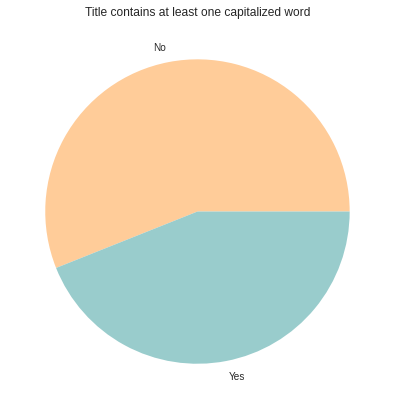

In [26]:
# function to check if the string contains any capitalized word
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

US_df["contains_capitalized"] = US_df["title"].apply(contains_capitalized_word)

value_counts = US_df["contains_capitalized"].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(value_counts, labels=['No', 'Yes'], colors=['#FFCC99', '#99CCCC'])
ax.set_title('Title contains at least one capitalized word')
plt.show()

In [27]:
US_df["contains_capitalized"].value_counts(normalize=True)

False    0.560429
True     0.439571
Name: contains_capitalized, dtype: float64

## Video title length
Now we'll take a look at the length of the title to see whether it has an impact on the video's popularity. 

Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trending video titles

In [28]:
US_df['title_length'] = US_df.title.apply(lambda x: len(x))
US_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24


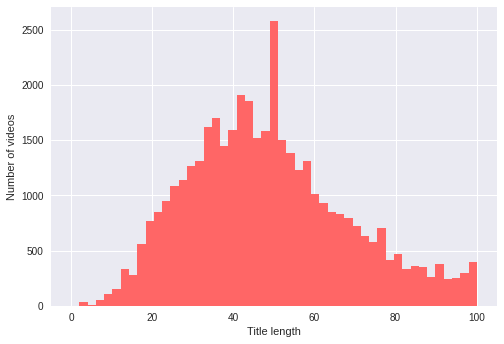

In [29]:
fig, ax = plt.subplots()

ax.hist(US_df.title_length, bins= np.linspace(0, 100, 50), color='#FF6666')
ax.set(ylabel='Number of videos', xlabel='Title length')
plt.show()

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

## Correlation between dataset variables
Now let's see how the dataset variables are correlated with each other. For example, we would like to see if number of views increases, will the figure of likes increases too or will it stay stable?

One of the mose easiest way to visualize correlation between variables is by using heatmap

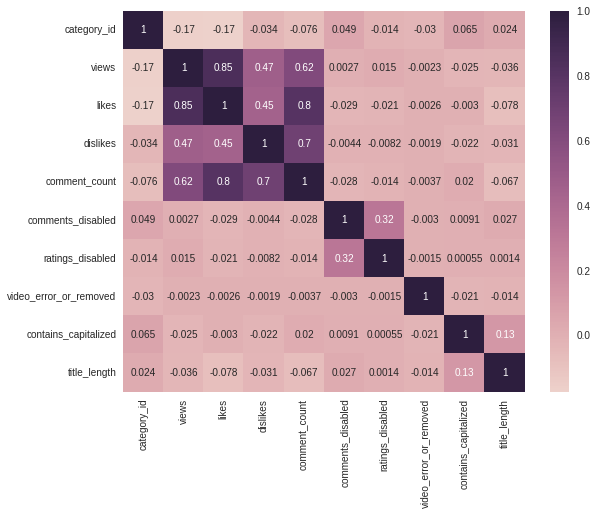

In [30]:
fig, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(US_df.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)
plt.show()

We see for example that **views** and **likes** are highly positively correlated with a correlation value of 0.85. We see also a high positive correlation (0.80) between **likes** and **comment_count**, and between **dislikes** and **comment_count** (0.70)

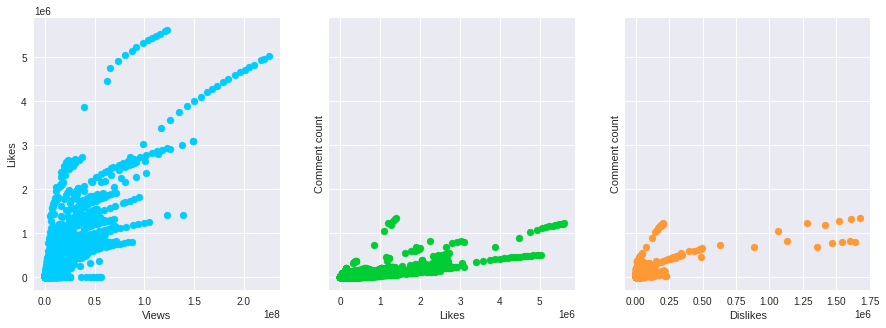

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
ax1.scatter(US_df.views, US_df.likes, c='#00CCFF')
ax1.set(xlabel='Views', ylabel='Likes')
ax2.scatter(US_df.likes, US_df.comment_count, c='#00CC33')
ax2.set(xlabel='Likes', ylabel='Comment count')
ax3.scatter(US_df.dislikes, US_df.comment_count, c='#FF9933')
ax3.set(xlabel='Dislikes', ylabel='Comment count')
plt.show()

## Most common words in video titles
Let's see if there are some words that are used significantly in trending video titles. We will display the 25 most common words in all trending video titles

In [36]:
title_words = list(US_df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

As you can see, there are a lot of stop words which doesn't contribute much sense to the title so we decided to remove all of the stop words.

In [37]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'are', "aren't", 'could', "couldn't", 'did', "didn't", 'does', "doesn't", 'had', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'might', "mightn't", 'must', "mustn't", 'need', "needn't", 'sha', "shan't", 'should', "shouldn't", 'was', "wasn't", 'were', "weren't", 'won', "won't", 'would', "wouldn't", '-', '|', '&']

In [38]:
filtered_list = [w for w in title_words if not w.lower() in stop_words]
Counter(filtered_list).most_common(25)

[('Video)', 1901),
 ('Trailer', 1868),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('ft.', 1017),
 ('Music', 703),
 ('2017', 683),
 ('2', 675),
 ('New', 575),
 ('[Official', 517),
 ('Game', 504),
 ('First', 497),
 ('10', 479),
 ('Show', 469),
 ('5', 464),
 ('Day', 461),
 ('Star', 452),
 ('Black', 447),
 ('[HD]', 445),
 ('Make', 444),
 ('Teaser', 441),
 ('(Audio)', 427),
 ('vs.', 414),
 ('Movie', 410)]

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

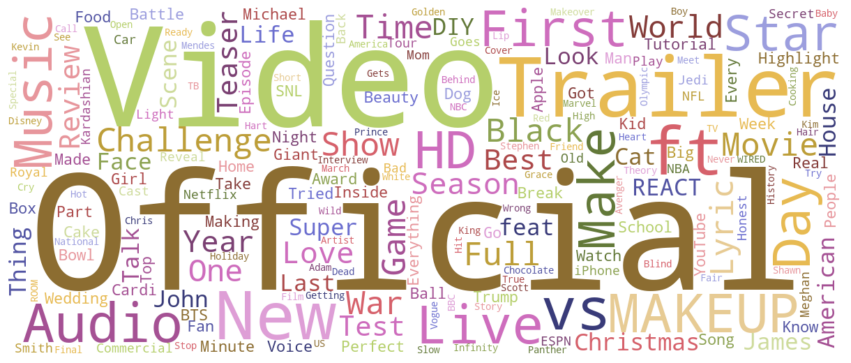

In [39]:
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(filtered_list))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

We can see that most of the trending videos related to such fields like **music**, **audio**, **make up**, ...

## Which channels have the largest number of trending videos?

In [ ]:
cdf = US_df.groupby('channel_title').size().reset_index(name='video_count').sort_values("video_count", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(7,7))
_ = sns.barplot(x="video_count", y="channel_title", palette=sns.cubehelix_palette(n_colors=20, light=0.1, reverse=True), data=cdf, ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")
plt.show()

## Which video category has the largest number of trending videos?

First we will add a column that contains category names based on the values in **category_id** column. We will load a JSON file which contains the **category_name** correspond to each **category_id**

In [50]:
with open('/content/drive/MyDrive/Colab Notebooks/data/trending_youtube/US_category_id.json') as f:
    categories = json.load(f)['items']

In [ ]:
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
US_df['category_name'] = US_df['category_id'].map(cat_dict)
US_df.head()

In [61]:
cdf = pd.DataFrame(US_df['category_name'].value_counts()).reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
cdf

,category_name,No_of_videos
0,Entertainment,9964
1,Music,6472
2,Howto & Style,4146
3,Comedy,3457
4,People & Blogs,3210
5,News & Politics,2487
6,Science & Technology,2401
7,Film & Animation,2345
8,Sports,2174
9,Education,1656


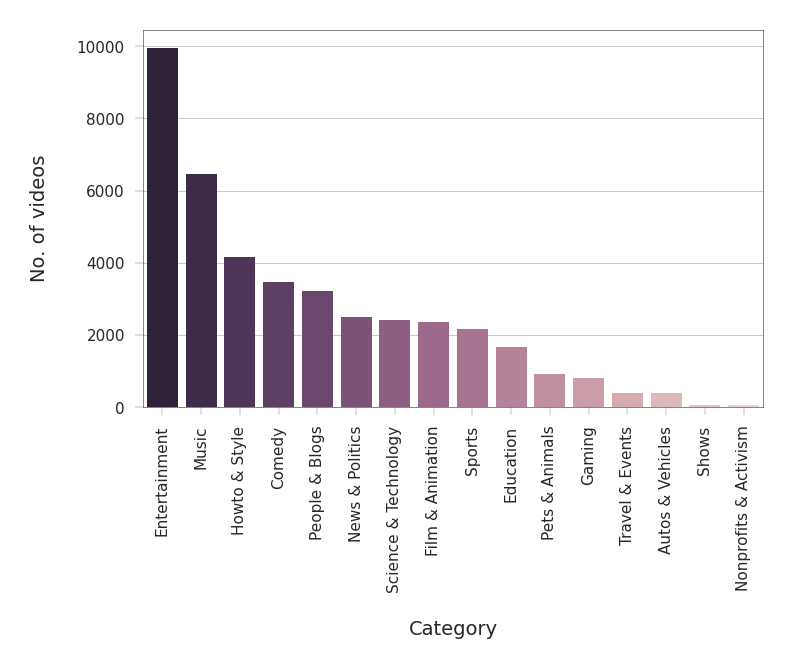

In [62]:
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf,
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the **Entertainment** category contains the largest number of trending videos among other categories: around 10,000 videos, followed by **Music** category with around 6,200 videos, followed by **Howto & Style** category with around 4,100 videos, and so on.

## Trending videos and their publishing time

In [71]:
US_df['publish_time'].head()

0    2017-11-13T17:13:01.000Z
1    2017-11-13T07:30:00.000Z
2    2017-11-12T19:05:24.000Z
3    2017-11-13T11:00:04.000Z
4    2017-11-12T18:01:41.000Z
Name: publish_time, dtype: object

In [77]:
US_df["publishing_day"] = US_df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
US_df["publishing_hour"] = US_df["publish_time"].apply(lambda x: x[11:13])

In [78]:
US_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length,category_name,publishing_day,publishing_hour
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,True,34,People & Blogs,Mon,17
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",True,62,Entertainment,Mon,07
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53,Comedy,Sun,19
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,False,32,Entertainment,Mon,11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24,Entertainment,Sun,18


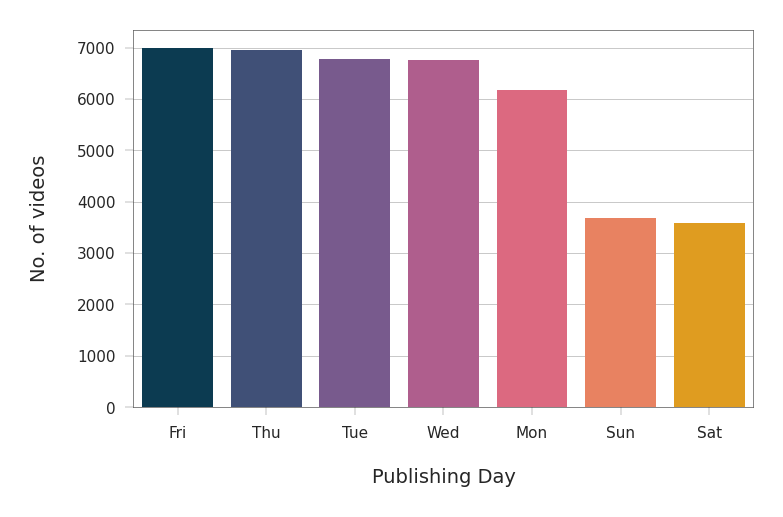

In [79]:
cdf = US_df["publishing_day"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos publishes on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

In [80]:
cdf = US_df["publishing_hour"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
cdf = cdf.sort_values(by='publishing_hour')

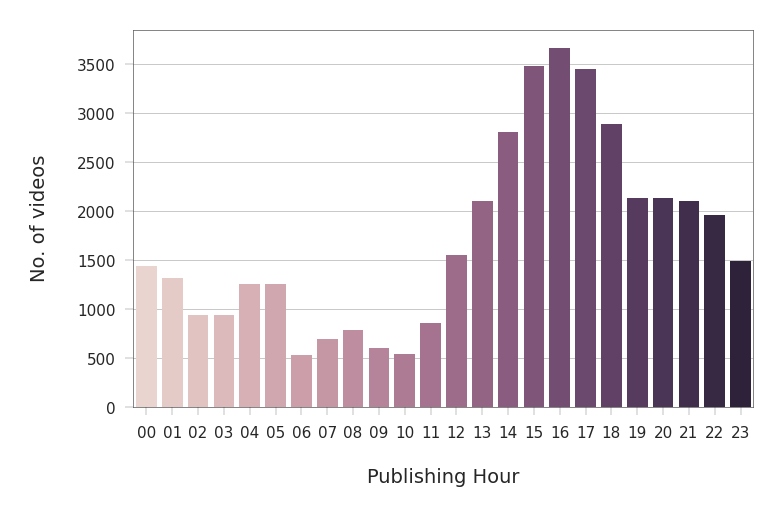

In [82]:
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos. 